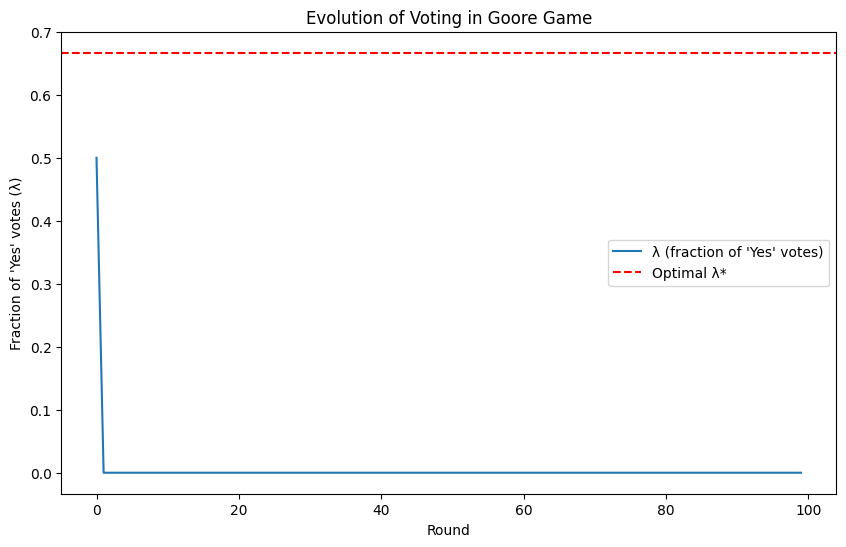

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of voters
lambda_star = 2/3  # Optimal fraction of "Yes" votes
rounds = 100  # Number of rounds
initial_yes_prob = 0.5  # Initial probability of a voter saying "Yes"

# Define the performance criterion G(λ)
def G(lambda_value):
    # A simple unimodal function that peaks at lambda_star
    return np.exp(-((lambda_value - lambda_star)**2) * 10)

# Initialize votes randomly
votes = np.random.rand(N) < initial_yes_prob
vote_history = []

# Simulate rounds
for _ in range(rounds):
    # Count the number of "Yes" votes
    yes_votes = np.sum(votes)
    lambda_value = yes_votes / N
    
    # Calculate probability of gaining a dollar
    gain_prob = G(lambda_value)
    
    # Each voter earns or loses a dollar independently
    gains = (np.random.rand(N) < gain_prob).astype(int) - 1
    
    # Voters update their voting based on gains
    votes = (gains == 1).astype(int)
    
    # Record the history
    vote_history.append(lambda_value)

# Plot the evolution of λ over time
plt.figure(figsize=(10, 6))
plt.plot(range(rounds), vote_history, label="λ (fraction of 'Yes' votes)")
plt.axhline(y=lambda_star, color='r', linestyle='--', label="Optimal λ*")
plt.xlabel("Round")
plt.ylabel("Fraction of 'Yes' votes (λ)")
plt.title("Evolution of Voting in Goore Game")
plt.legend()
plt.show()


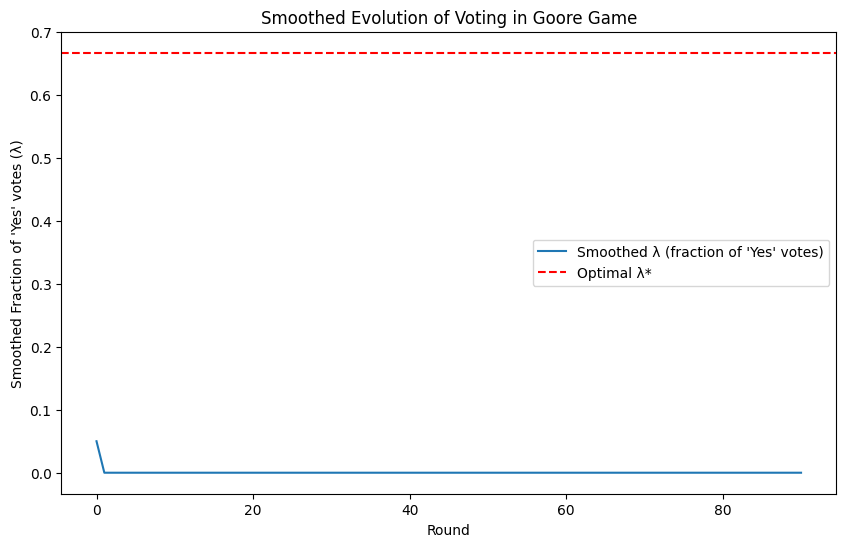

In [3]:
window_size = 10
smoothed_vote_history = np.convolve(vote_history, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(10, 6))
plt.plot(range(len(smoothed_vote_history)), smoothed_vote_history, label="Smoothed λ (fraction of 'Yes' votes)")
plt.axhline(y=lambda_star, color='r', linestyle='--', label="Optimal λ*")
plt.xlabel("Round")
plt.ylabel("Smoothed Fraction of 'Yes' votes (λ)")
plt.title("Smoothed Evolution of Voting in Goore Game")
plt.legend()
plt.show()


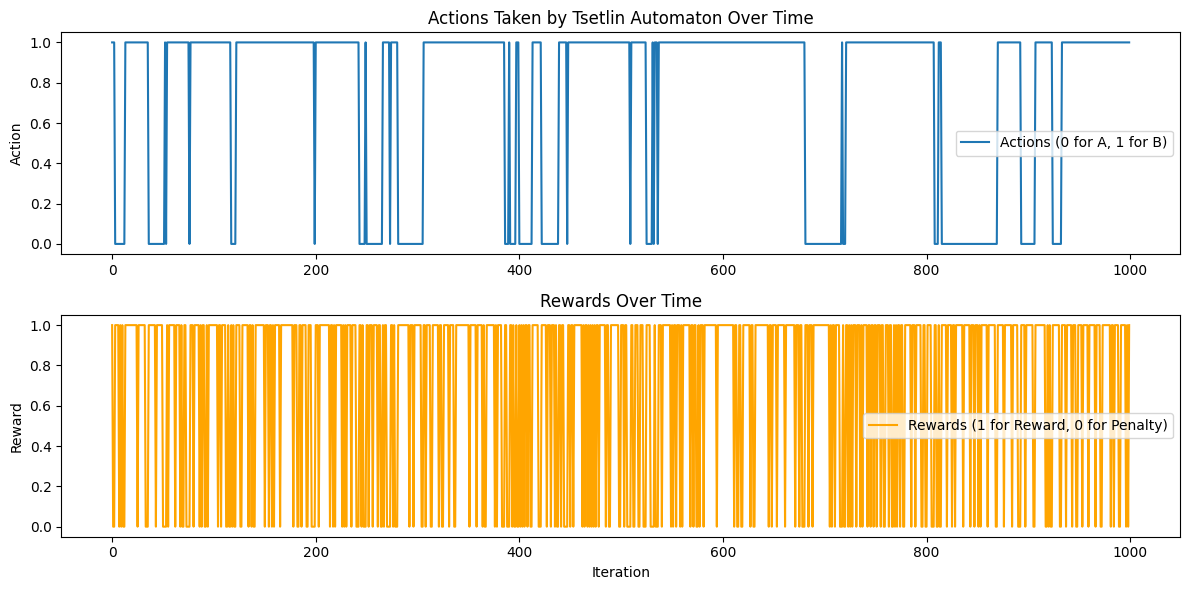

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class TsetlinAutomaton:
    def __init__(self, states=5):
        """
        Initialize the Tsetlin Automaton.
        
        Parameters:
        states: int - The number of states for each action. Must be an odd number.
        """
        self.states = states
        self.state = states // 2  # Start in the middle state
        self.action = 0  # Action A by default

    def take_action(self):
        """
        Decide on an action based on the current state.
        
        Returns:
        action: int - The chosen action (0 or 1).
        """
        self.action = 0 if self.state < self.states // 2 else 1
        return self.action

    def update_state(self, reward):
        """
        Update the state of the automaton based on the received reward.
        
        Parameters:
        reward: int - The reward received (1 for reward, 0 for penalty).
        """
        if self.action == 0:
            if reward == 1 and self.state > 0:
                self.state -= 1  # Move left towards action B
            elif reward == 0 and self.state < self.states - 1:
                self.state += 1  # Move right towards action A
        else:
            if reward == 1 and self.state < self.states - 1:
                self.state += 1  # Move right towards action A
            elif reward == 0 and self.state > 0:
                self.state -= 1  # Move left towards action B

# Simulating the Tsetlin Automaton
np.random.seed(42)  # For reproducibility
automaton = TsetlinAutomaton(states=5)

iterations = 1000
actions = []
rewards = []

for i in range(iterations):
    action = automaton.take_action()
    reward = 1 if np.random.rand() < 0.7 else 0  # 70% chance of reward
    
    automaton.update_state(reward)
    actions.append(action)
    rewards.append(reward)

# Visualization of the results
plt.figure(figsize=(12, 6))

# Plot the actions taken over time
plt.subplot(2, 1, 1)
plt.plot(actions, label="Actions (0 for A, 1 for B)")
plt.title("Actions Taken by Tsetlin Automaton Over Time")
plt.ylabel("Action")
plt.legend()

# Plot the rewards over time
plt.subplot(2, 1, 2)
plt.plot(rewards, label="Rewards (1 for Reward, 0 for Penalty)", color='orange')
plt.title("Rewards Over Time")
plt.xlabel("Iteration")
plt.ylabel("Reward")
plt.legend()

plt.tight_layout()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

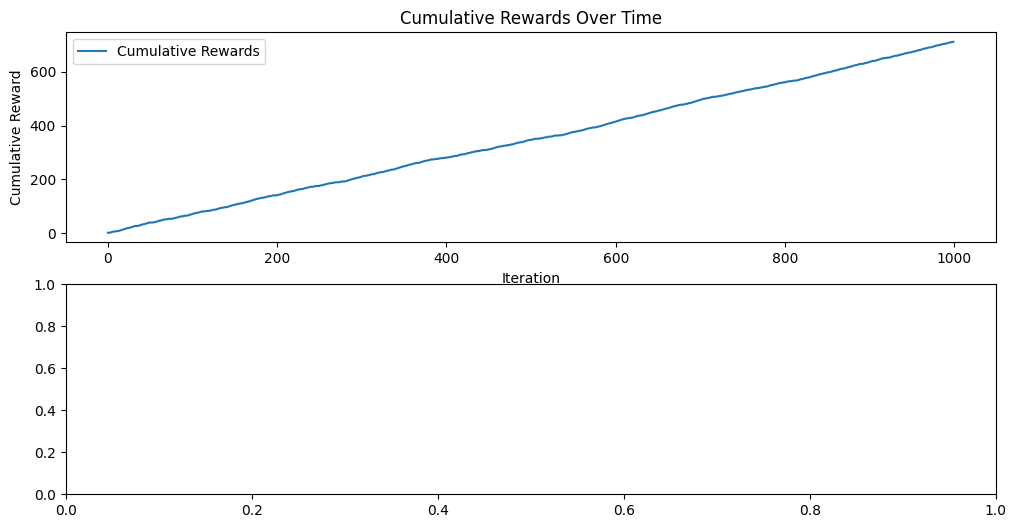

In [4]:
# Cumulative rewards
cumulative_rewards = np.cumsum(rewards)

plt.figure(figsize=(12, 6))

# Plot cumulative rewards
plt.subplot(2, 1, 1)
plt.plot(cumulative_rewards, label="Cumulative Rewards")
plt.title("Cumulative Rewards Over Time")
plt.xlabel("Iteration")
plt.ylabel("Cumulative Reward")
plt.legend()

# State transitions
plt.subplot(2, 1, 2)
plt.plot(range(iterations), automaton.state, label="State")
plt.title("State Transitions Over Time")
plt.xlabel("Iteration")
plt.ylabel("State")
plt.legend()

plt.tight_layout()
plt.show()
